## Processamento Digital de Imagens (PDI) - Aplicações

Há diversas aplicações úteis no campo de visão computacional, dentre elas temos:
- Classificação de imagens;
- Detecção de objetos;
- Segmentação de imagens;

Qual a diferença entre elas?

No nosso dia-a-dia, conseguimos ver diferentes imagens. Ao olhar para essas imagens, o nosso cérebro, consegue decodificar o que os nosso olhos exergam, e identificamos **padrões**.

Ao diferenciar a letra `A` da letra `B`, estamos fazendo uma classificação, o mesmo ocorre ao diferenciar um cachorro de um gato!

Apesar de parecer um trabalho simples essa classificação de imagem para nós, é um grande desafio e apresenta uma grande complexidade computacional!

![https://cdn.vox-cdn.com/thumbor/BH9s7fosl_469YWr4z0vFxEwTr8=/0x0:1196x812/920x613/filters:focal(503x364:693x554):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/68928868/apple_ipod_test.0.jpg](https://cdn.vox-cdn.com/thumbor/BH9s7fosl_469YWr4z0vFxEwTr8=/0x0:1196x812/920x613/filters:focal(503x364:693x554):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/68928868/apple_ipod_test.0.jpg)

Essa classificação estranha ocorreu por pegarmos a imagem com um todo, e tentamos predizer qual seria o objeto mais provável.

Por exemplo na imagem abaixo iriamos classificar gato ou cachorro?

![https://miro.medium.com/max/506/0*nclm0Ik4OlKnjO_F.jpeg](https://miro.medium.com/max/506/0*nclm0Ik4OlKnjO_F.jpeg)

No nosso cérebro conseguimos identificar intuitivamente que o gato está na esquerda e o cachorro na direita, mas como funciona para a máquina?

Essa tarefa é conhecida como **detecção de objetos**. Conseguindo identificar a localização e a classe que um dado objeto pertence na imagem.

Quando temos apenas um objeto e queremos localizá-lo na imagem, essa tarefa é conhecida como **localização da imagem**.

![https://miro.medium.com/max/1038/0*zs2zJGdh92YUH98A.png](https://miro.medium.com/max/1038/0*zs2zJGdh92YUH98A.png)

Como o computador consegue entender os limites de cada objeto?

Esse processo de compreender e identificar os limites de cada objeto dentro de uma imagem é conhecida como **segmentação da imagem** (image segmentation). Nesse processo dividimos a imagem em pedaços menos e começamos a agrupar os pequenos pedaços que possuem atributos semelhantes. Após esse processo conseguimos identificar quais regiões possuem informaçnoes que conseguimos detectar ou classificar!

![https://miro.medium.com/max/1200/0*VX1UNfrNgjRD24Kq.jpg](https://miro.medium.com/max/1200/0*VX1UNfrNgjRD24Kq.jpg)

A segmentação A segmentação busca compreender o espaço que que um objeto de interesse se encontra, enquanto na detecção de objetos temos o objetivo de criar caixas para cada classe de imagem. Note que a detecção de objetos não diz qual o formato ou a posição exata do objeto na imagem!



### Classificação de imagens

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten
import tensorflow.keras as keras
from skimage import feature

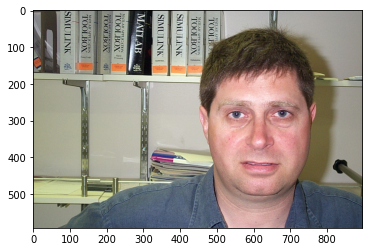

In [36]:
img = cv2.imread('../i_labeled/i_labeled/0/image_0001.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [37]:
img

array([[[ 82,  75,  65],
        [ 67,  63,  52],
        [ 77,  74,  65],
        ...,
        [150, 146, 145],
        [152, 148, 145],
        [170, 166, 163]],

       [[ 82,  75,  67],
        [ 72,  68,  59],
        [ 89,  86,  77],
        ...,
        [150, 146, 143],
        [151, 147, 144],
        [169, 165, 162]],

       [[ 84,  79,  73],
        [ 80,  75,  69],
        [ 83,  80,  73],
        ...,
        [149, 146, 141],
        [150, 147, 142],
        [168, 165, 160]],

       ...,

       [[130, 136, 122],
        [130, 136, 122],
        [137, 143, 129],
        ...,
        [ 48,  66,  90],
        [ 38,  56,  80],
        [ 32,  50,  74]],

       [[136, 139, 128],
        [132, 135, 124],
        [133, 137, 123],
        ...,
        [ 54,  70,  95],
        [ 49,  65,  90],
        [ 20,  36,  61]],

       [[135, 138, 127],
        [134, 137, 126],
        [132, 136, 122],
        ...,
        [ 53,  67,  93],
        [ 54,  68,  94],
        [ 33,  47,  73]]

In [38]:
files = [file for file in glob.glob('../i_labeled/i_labeled/*/*.jpg')]
files

['../i_labeled/i_labeled/12/image_0205.jpg',
 '../i_labeled/i_labeled/12/image_0210.jpg',
 '../i_labeled/i_labeled/12/image_0204.jpg',
 '../i_labeled/i_labeled/12/image_0201.jpg',
 '../i_labeled/i_labeled/12/image_0206.jpg',
 '../i_labeled/i_labeled/12/image_0211.jpg',
 '../i_labeled/i_labeled/12/image_0215.jpg',
 '../i_labeled/i_labeled/12/image_0203.jpg',
 '../i_labeled/i_labeled/12/image_0198.jpg',
 '../i_labeled/i_labeled/12/image_0208.jpg',
 '../i_labeled/i_labeled/12/image_0207.jpg',
 '../i_labeled/i_labeled/12/image_0209.jpg',
 '../i_labeled/i_labeled/12/image_0216.jpg',
 '../i_labeled/i_labeled/12/image_0200.jpg',
 '../i_labeled/i_labeled/12/image_0199.jpg',
 '../i_labeled/i_labeled/12/image_0213.jpg',
 '../i_labeled/i_labeled/12/image_0197.jpg',
 '../i_labeled/i_labeled/12/image_0202.jpg',
 '../i_labeled/i_labeled/12/image_0212.jpg',
 '../i_labeled/i_labeled/12/image_0196.jpg',
 '../i_labeled/i_labeled/12/image_0214.jpg',
 '../i_labeled/i_labeled/1/image_0031.jpg',
 '../i_labe

In [60]:
import glob
label = []
for i, file in enumerate(files):
    img = cv2.imread(file) ### ler a imagem
    img = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    labels = file.split('/')[3]
    name = file.split('/')[-1]
    cv2.imwrite('../dataset/gray/' + label + '/' + name + '.png', img_gray)
    print(label)
    labels.append(label)

In [61]:
dataset = []
files = [file for file in glob.glob('../dataset/gray/*.png')]
files.sort()
for file in files:
    img = cv2.imread(file) ### ler a image
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    dataset.append(img_gray)

In [62]:
dataset

[]

TypeError: Invalid shape (0,) for image data

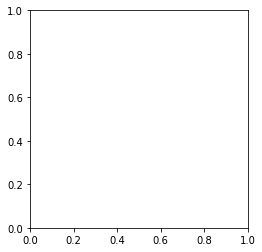

In [63]:
plt.imshow(dataset, cmap='gray');

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.33, stratify=labels, random_state=42)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
print('tamanho do dataset de treino:', X_train.shape)
print('tamanho do dataset de teste:', X_test.shape)

In [ ]:
plt.imshow(X_train[4]);
print(y_train[4])

In [ ]:
X_train_rf = X_train.reshape(X_train.shape[0], -1)
X_test_rf = X_test.reshape(X_test.shape[0], -1)
print(X_train_rf.shape)

In [ ]:
X_train[0].shape

In [ ]:
592*896*3

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train_rf, y_train) 
y_pred_rf = clf.predict(X_test_rf)

In [ ]:
print(classification_report(y_test, y_pred_rf))

#### Vamos utilizar técnicas de pré-processamento de imagens para melhorar o desempenho

In [ ]:
dataset_train = []
dataset_test = []

for img in X_train:
    
    img = cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
    #clahe = cv2.createCLAHE(clipLimit= 2,tileGridSize=(3,3))
    #cl1 = clahe.apply(img)
    img_eq = cv2.equalizeHist(img)
    dataset_train.append(img)

In [ ]:
for img in X_test:
    
    img = cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
    #clahe = cv2.createCLAHE(clipLimit= 2,tileGridSize=(3,3))
    #cl1 = clahe.apply(img)
    img_eq = cv2.equalizeHist(img)
    dataset_test.append(img)

In [ ]:
plt.imshow(dataset_train[100], cmap='gray');

In [ ]:
X_train_ = np.asarray(dataset_train)
X_test_ = np.asarray(dataset_test)
print('tamanho do dataset de treino:', X_train_.shape)
print('tamanho do dataset de teste:', X_test_.shape)

In [ ]:
X_train_rf = X_train.reshape(X_train_.shape[0], -1)
X_test_rf = X_test.reshape(X_test_.shape[0], -1)
print(X_train_rf.shape)

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train_rf, y_train) 
y_pred_rf = clf.predict(X_test_rf)

In [ ]:
print(classification_report(y_test, y_pred_rf))

In [ ]:
print(classification_report(y_test, y_pred_rf))

#### Deep Learning - Redes Neurais Convolucionais

* Algoritmo que aplica diferentes filtros para extração de features da imagem
* A tarefa do algoritmo é aprender quais os filtros mais adequados para aquele dataset

![Title](../imgs/cnn.png)


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_images.shape

In [ ]:
X_train_cnn, X_test_cnn = X_train_cnn/ 255.0, X_test_cnn/255.0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

In [ ]:
y_pred_cnn = np.argmax(model.predict(test_images), axis = -1)

In [ ]:
print(classification_report(test_labels, y_pred_cnn))